<a href="https://colab.research.google.com/github/Leena-GO/Self-study/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%2B_%EB%94%A5%EB%9F%AC%EB%8B%9D_03__%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03-3 특성 공학과 규제

- 앞서 공부했던 *다항 회귀*에서, 훈련 세트보다 테스트 세트의 점수가 높은 **과소 적합**의 문제가 있었다.
- 이를 해결하기 위해, **다중 회귀**를 사용해본다.

## 1. 다중 회귀(Multiple Regression)
- **다중회귀**: 여러 개의 특성을 사용한 선형 회귀, 특성이 많으면 선형모델은 강력한 성능을 발휘한다.
  - 2개의 특성을 사용하면, 선형회귀는 *평면(3차원)*을 학습하게 된다.
  - *타깃 = (a x 특성1) + (b x 특성2) + 절편* 

- 위 식과 같이, 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업을 **특성 공학**(Feature Engineering)이라고 한다.


---
- 특성이 3개로 늘어났기 때문에, numpy 대신 pandas DataFrame을 사용하여 데이터를 활용하도록 한다.


In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy() #DataFrame을 numpy 배열로 바꿔주는 메서드

In [ ]:
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [ ]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [ ]:
#타깃 데이터 준비
import numpy as np

#농어의 특성을 활용하여 무게를 예측하는 작업이기 때문에, 타깃 데이터가 되는 무게만 가지고 온다.
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
#perch_full과 perch_weight을 훈련 세트와 테스트 세트로 나눠주기

from sklearn.model_selection import train_test_split

# train_input, train_target, test_input, test_target = train_test_split(perch_full, perch_weight, random_state = 42)
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

- 정말 크게 깨달은 점: input 데이터와 target 데이터의 순서를 달리 하면, 문제가 생긴다ㅠㅠ
  - 

In [ ]:
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [ ]:
train_target

array([[ 8.4 ,  2.11,  1.41],
       [18.  ,  5.22,  3.32],
       [27.5 ,  7.28,  4.57],
       [21.3 ,  6.38,  3.53],
       [22.5 ,  5.86,  3.62],
       [40.  , 11.14,  6.63],
       [30.  ,  7.62,  4.77],
       [24.6 ,  6.73,  4.17],
       [39.  , 11.14,  7.49],
       [21.  ,  5.69,  3.67],
       [43.5 , 12.6 ,  8.14],
       [16.2 ,  4.59,  2.63],
       [28.  ,  7.82,  4.2 ],
       [27.3 ,  8.32,  5.14]])

In [ ]:
test_input

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

- test_input이 'perch_full' 데이터를 활용하여 input 데이터가 되어야 하는데, 순서가 바뀌어서 이런 문제가 발생하게 된 것..!!!!

In [ ]:
test_poly = poly.transform(test_input)

ValueError: ignored

## 2. 사이킷런의 변환기
- 사이킷런은 **특성을 만들**거나, **전처리**하기 위한 다양한 클래스를 제공하는데, 이러한 클래스를 **변환기**(transformer)라고 한다.
  - 변환기 클래스는 모두 **fit()**, **transform()** 메서드를 제공한다.
  - 앞서 배운 LinearRegression 같은 사이킷런 모델 클래스는 **추정기**(estimator)라고 한다.



  - 이번 공부에서는 **PolynomialFeatures**클래스를 사용한다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

#테스트로, 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보자.
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

- 변환기(transformer)는 타깃 데이터가 필요하지 않다.
  - 예) k-최근접이웃 회귀에서는 **knr.fit(train_input, train_target)** 과 같이, 타깃 데이터를 넣어주었다.


- 위에서 보다시피, 2개의 특성(원소)을 가진 샘플 [2,3]이 6개의 특성을 가진 샘플 [1,2,3,4,6,9]로, 특성이 많아졌다!


---

- PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가한다.



- 위의 상황에서, 1은 왜 추가가 된 것일까?
  - *무게 = (a x 길이) + (b x 높이) + (c x 두께) + (d x 1)*
  - 선형 방정식의 절편은, 항상 값이 1인 특성과 곱해지는 계수로 볼 수 있다.
  - 사이킷런의 선형 모델은 자동으로 절편을 추가하므로, 굳이 1을 필요로 하지 않는다.
  - **include_bias = False**로 지정하여 특성을 변환해보자.



---


**PolynomialFeatures**: Generate polynomial and interaction features.

  - Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
    - For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

- Parameters

  - degree : integer
      - The degree of the polynomial features. Default = 2.

  - interaction_only : boolean, default = False
      - If true, only interaction features are produced: features that are
    products of at most degree distinct input features. (거듭제곱 항 제외)

  - include_bias : boolean
      - If True (default), then include a bias column, the feature in which
    all polynomial powers are zero (i.e. a column of ones - acts as an
    intercept term in a linear model).

  - order : str in {'C', 'F'}, default 'C'
      - Order of output array in the dense case. 'F' order is faster to
    compute, but may slow down subsequent estimators.

In [ ]:
poly = PolynomialFeatures(include_bias = False)

poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

- 이렇게, 절편을 위한 항이 제거되고, 특성의 제곱과 특성끼리 곱한 항만 추가가 되었다.
- 이 방식으로 *train_input*에 적용해보자.

In [ ]:
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [ ]:
#train_input의 총 len은 42개
len(train_input)

42

In [ ]:
#위 9개 특성이 어떻게 만들어졌는지 확인하는 방법: get_feature_names()
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
#기존에 있던 3개의 특성을 가지고, 위의 방법으로 9개의 특성까지 만들어냈다.
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [ ]:
#테스트 세트 변환하기
test_poly = poly.transform(test_input)

- 이제, 이렇게 변환된 특성을 활용하여 다중 회귀 모델을 훈련해보자.
- 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들여보자!

## 3. 다중 회귀 모델 훈련하기
- 다중 회귀 모델을 훈련하는 것은, 선형 회귀 모델을 훈련하는 것과 같다. 하지만, **여러 개의 특성**을 사용하여 선형 회귀를 수행한다는 점이 다르다.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.score(train_poly, train_target)

0.9903183436982124

In [ ]:
#테스트 세트에 대한 점수도 같이 확인
lr.score(test_poly, test_target)

0.9714559911594132

- 농어의 길이만 사용했을 때 있던 과소적합의 문제는 사라졌다.

- 특성을 더 많이 사용하게 된다면?

In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape
#만들어진 특성의 개수가 무려 55개나 된다.

(42, 55)

In [ ]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999991096

In [ ]:
#테스트 세트에 대한 결과는?
lr.score(test_poly, test_target)

-144.40579242335605

- 위와 같이, 특성의 개수를 늘리면 선형 모델은 아주 강력해져서 훈련 세트에 대해 거의 완벽한 학습이 가능해진다.
- 하지만, 훈련 세트에 과대적합되기 때문에 테스트 세트에서는 적합되지 않아 음수가 나오게 된 것이다.
- 또한, 사용된 샘플의 개수는 42개인데, 55개의 특성으로 훈련을 하게 된 모습이다.
  - 42개의 참새를 맞추기 위해서 딱 한 번 새총을 쏴야 한다면, 참새 떼 중앙을 겨냥하여 가능한 맞출 가능성을 높여야 한다.
  - 하지만 55번이나 쏠 수 있다면, 한 번에 하나씩 모든 참새를 맞출 수 있기 때문에 훈련 세트에서 점수가 높게 나오게 된 것이다.

## 4. 규제 (Regularization)
- **규제**: 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방하는 것 (모델이 훈련 세트에 **과대적합 되지 않도록** 만드는 것)
  - 선형 회귀 모델의 경우, 특성에 곱해지는 **계수(기울기)의 크기를 작게 만드는 것**이다.



---

- 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여보자.

- **특성의 스케일**
  - 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이 나게 된다. (2장 참고)
  - 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다.
  - 따라서, **규제 적용 전에 정규화 작업**을 진행해주어야 한다.



  - 2장에서는 평균과 표준편차를 직접 구해 특성을 표준점수로 바꾸었지만, 이번에는 **StandardScaler** 클래스를 사용한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) #PolynomialFeatures 클래스로 만든 train_poly(훈련세트)로 이 객체 학습

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
train_poly.shape

(42, 55)

- 선형 회귀 모델에 규제를 추가한 모델을 **릿지**(ridge)와 **라쏘**(lasso)라고 한다.
  - **릿지**: 계수를 곱한 값을 기준으로 규제를 적용
  - **라쏘**: 계수의 절댓값을 기준으로 규제를 적용, 계수의 크기를 0으로 만들 수 있다.

## 5. 릿지 회귀
- 릿지와 라쏘 모두 sklearn.linear_model 패키지 안에 있다.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

- 선형 회귀에서 나왔던 점수(0.9999999999991096)보다 조금 낮은 점수가 나왔다.

In [ ]:
#test set 점수 확인
ridge.score(test_scaled, test_target)

0.9790693977615398

- 정규화가 되지 않았던 상태의 점수 (-144.40579242335605)에 비해, 정상화가 된 모습을 볼 수 있다.


---
- 릿지와 랏쏘 모델을 사용할 때, **alpha 매개변수**를 사용함으로써 규제의 강도를 임의로 조절할 수 있다.

| alpha 값이 큰 경우 |alpha 값이 작은 경우   |
|:-:|:-:|
|규제강도가 세다 | 규제강도가 약하다  |
|계수 값이 줄어듦|계수 값이 커짐|
|과소적합 유도|과대적합 가능성 커짐|


- **하이퍼파라미터**: 머신러닝 알고리즘이 학습하지 않는 파라미터, 사람이 사전에 지정해주어야 한다.
  - ex) alpha 파라미터
    - 적절한 alpha 값 찾는 방법: alpha 값에 대한 R²을 그려보는 것이다.
   - 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [ ]:
#alpha값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만든다.
import matplotlib.pyplot as plt 
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  #릿지 모델 만들기
  ridge = Ridge(alpha = alpha)
  
  #릿지 모델 훈련
  ridge.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

- alpha 값을 0.001부터 10배씩 늘렸기 때문에, alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현한다.
  - ex) 0.001 → -3 / 0.01 → -2

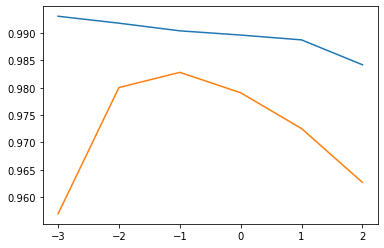

In [ ]:
plt.plot(np.log10(alpha_list), train_score) #파랑색 그래프
plt.plot(np.log10(alpha_list), test_score) #주황색 그래프
plt.show()

In [ ]:
print(train_score)
print('\n')
print(test_score)
print('\n')

score_zip_1 = zip(train_score, test_score)
difference1 = []

for train_score_1, test_score_1 in score_zip_1:
  score = (train_score_1 - test_score_1)
  difference1.append(score)

print(difference)

[0.9924957354689654, 0.9922988130765112, 0.9902080238600285, 0.9898116789062786, 0.9887624603020235, 0.9078618674946646]


[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


[0.01931398519661598, 0.016144251958056466, 0.007769725463167898, 0.00962726517366741, 0.0057314957711792625, -0.0012153398077866528]


- -3일 때: 훈련 세트와 테스트 세트의 점수 차이가 아주 큼 / *과대적합*

- 2일 때: 훈련 세트와 테스트 세트의 점수가 모두 낮아짐 / *과소적합*

- -1일 때: 두 그래프의 차이가 제일 낮아지는 경우
  - log함수를 사용했기 때문에, logㅈ -3일 때: 훈련 세트와 테스트 세트의 점수 차이가 아주 큼 / *과대적합*

  - 2일 때: 훈련 세트와 테스트 세트의 점수가 모두 낮아짐 / *과소적합*

  - -1일 때: 두 그래프의 차이가 제일 낮아지는 경우
    - log함수를 사용했기 때문에, 10^-1 = 0.1 인 alpha 값이 최적.

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)


print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


## 6. 라쏘 회귀
- 라쏘는 릿지와 달리 **계수 값**을 **0**으로 만들 수 있다.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.9897898972080961

- 라쏘에서도 역시, 선형 회귀에서 나왔던 점수(0.9999999999991096)보다 조금 낮은 점수가 나왔다.

In [ ]:
lasso.score(test_scaled, test_target)

0.9800593698421883

- 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  
  #라쏘 모델 만들기
  lasso = Lasso(alpha = alpha, max_iter = 10000)

  #라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


- 라쏘 모델을 훈련할 때, **ConvergenceWarning**이란 경고가 발생한다.
- 라쏘 모델은 최적 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생한다.
- 이 문제를 해결하기 위해 **max_iter** 매개변수의 값을 지정해준 것이다!

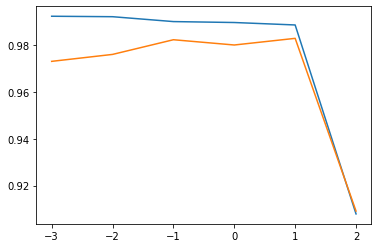

In [ ]:
plt.plot(np.log10(alpha_list), train_score) 
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
print(train_score)
print('\n')
print(test_score)


#train_score과 test_score의 점수차 계산하기
score_zip = zip(train_score, test_score)
difference = []
for train_score_i, test_score_i in score_zip:
  difference.append(train_score_i - test_score_i)

print('\n')
print(difference)

[0.9924957354689654, 0.9922988130765112, 0.9902080238600285, 0.9898116789062786, 0.9887624603020235, 0.9078618674946646]


[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


[0.01931398519661598, 0.016144251958056466, 0.007769725463167898, 0.00962726517366741, 0.0057314957711792625, -0.0012153398077866528]


- 여기서는 10¹ = 10 인 1이 alpha 값이 최적이라고 볼 수 있다.

In [ ]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
#라쏘 모델 계수 중, 계수 값이 0인 항목들의 개수
np.sum(lasso.coef_ == 0)

40

- 계수 값이 0인 항목들의 개수가 40개인 것으로 보아, 라쏘 모델이 사용한 특성은 15개밖에 되지 않는다는 것을 알 수 있다.
- 라쏘 모델은 이렇게 **유용한 특성을 골라내는 용도**로 사용할 수 있다.

In [ ]:
poly_test = PolynomialFeatures(include_bias = True)
poly_test.fit([[2,3]])
poly_test.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])